In [1]:
# encoding=utf8

# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

In [2]:
    data_values = pd.read_csv('data/clean_Data.csv', 
                              usecols=['building_id',
                                       'land_surface_condition',
                                       'has_superstructure_mud_mortar_stone',
                                       'has_superstructure_cement_mortar_brick',
                                       'has_superstructure_rc_engineered',
                                       'has_superstructure_rc_non_engineered',
                                       'has_superstructure_timber',
                                       'has_superstructure_stone_flag',
                                       'has_superstructure_bamboo',
                                       'has_superstructure_cement_mortar_stone',
                                       'has_superstructure_adobe_mud',
                                       'damage_grade'
    ])
data_values.head()

,building_id,land_surface_condition,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,damage_grade
0,802906,t,True,True,False,False,False,False,False,False,False,3
1,28830,o,False,True,False,False,False,False,False,False,False,2
2,94947,t,False,True,False,False,False,False,False,False,False,3
3,590882,t,False,True,False,False,False,True,True,False,False,2
4,201944,t,True,False,False,False,False,False,False,False,False,3


In [4]:
data_values["cantidad"] = 1
data_values.head()

,building_id,land_surface_condition,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,damage_grade,cantidad
0,802906,t,True,True,False,False,False,False,False,False,False,3,1
1,28830,o,False,True,False,False,False,False,False,False,False,2,1
2,94947,t,False,True,False,False,False,False,False,False,False,3,1
3,590882,t,False,True,False,False,False,True,True,False,False,2,1
4,201944,t,True,False,False,False,False,False,False,False,False,3,1


In [52]:
#Tipo de daño segun condicion de superficie
dmg_grade_by_land_surf = data_values.groupby(["land_surface_condition", "damage_grade"]).agg({"cantidad" : "count"}).reset_index()
dmg_grade_by_land_surf

,land_surface_condition,damage_grade,cantidad
0,n,1,2556
1,n,2,21484
2,n,3,11488
3,o,1,602
4,o,2,4708
5,o,3,3006
6,t,1,21966
7,t,2,122067
8,t,3,72724


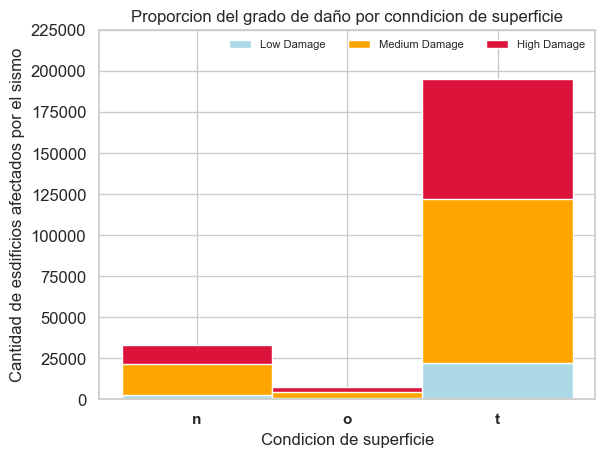

In [66]:
dmg_1 = list(dmg_grade_by_land_surf.loc[dmg_grade_by_land_surf["damage_grade"]==1,"cantidad"])
dmg_2 = list(dmg_grade_by_land_surf.loc[dmg_grade_by_land_surf["damage_grade"]==2,"cantidad"])
dmg_3 = list(dmg_grade_by_land_surf.loc[dmg_grade_by_land_surf["damage_grade"]==3,"cantidad"])

my_colors = ['lightblue','orange','crimson']
header = ["Low Damage","Medium Damage","High Damage"]

r = [0,1,2]
names = ['n', 'o', 't']
barWidth = 1

p1 = plt.bar(r, dmg_1, color=my_colors[0], edgecolor='white', width=barWidth, label = 'Low Damage')
p2 = plt.bar(r, dmg_2, bottom = dmg_1, color=my_colors[1], edgecolor='white', width=barWidth, label = 'Medium Damage')
p3 = plt.bar(r, dmg_3, bottom = dmg_2, color=my_colors[2], edgecolor='white', width=barWidth, label = 'High Damage')

plt.ylim([0,225000])
plt.xticks(r, names, fontweight='bold')
plt.yticks(fontsize=12)
plt.title("Proporcion del grado de daño por conndicion de superficie",fontsize = 12)
plt.xlabel("Condicion de superficie")
plt.ylabel("Cantidad de esdificios afectados por el sismo", fontsize=12)
plt.legend((p1[0], p2[0], p3[0]), (header[0], header[1], header[2]), fontsize=8, ncol=3, framealpha=0, fancybox=True)
plt.show()

In [45]:
dmg_1

[2556, 602, 21966]